In [7]:
import numpy as np
from matplotlib.pyplot import figure
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import pandas as pd
from definitions import ROOT_DIR
%cd $ROOT_DIR
SHOW_TITLE = False

/home/x/doc/dev/master/CancerTherapyPrediction


In [8]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
USE_REAL_TIME = True

def unit_step_fun(x,threshold):
    return x*(1 / 2 + 1 / 2 *np.tanh(100 * (x-threshold)))

from data.klusek.EP1.config import threatment_start, threatment_end,threatment2_start

threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/EP1/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)

params = {'z': 328246.7736170587, 't': -1.121678857002584e-16, 'lambda_p': 5.204250392708521, 'K': 295623.27996955224, 'gamma_p': 0.01979092623407549, 'eta': 0.2969245993829189, 'KDE': 0.04300307864242144, 'P0': 142730, 'C0': 5.380861282944324}



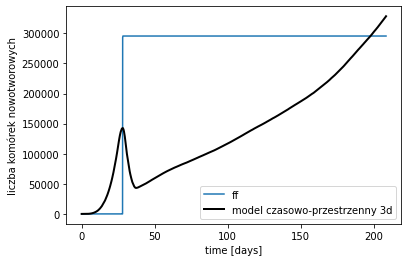

In [9]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth


def differentialForward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']
    eta = eta*paras['C0']

    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]




# USE_REAL_TIME = False


plot_parameters(differentialForward,params,steps_forward,steps_backward,threatment_start,"ff",USE_REAL_TIME,t_real)


plot_truth(t_true,P_true, USE_REAL_TIME,t_real)
if SHOW_TITLE:
    plt.title("Wpływ długości przedziału uczenia na jakość dopasowania modelu")
plt.legend()
plt.show()